# Importing Repositories

In [134]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import holidays
from scipy import stats
warnings.filterwarnings("ignore")
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize']=(20,10)

In [135]:
def missing_zero_values_table(df):
        ''''Takes a pandas dataframe and returns a statistics table that explains the missing and 
        zero values'''
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Our selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
    
        return mz_table

# Importing data files

## Paths for files

In [136]:
path_price = r'C:\Users\2836589S\OneDrive - University of Glasgow\Data\DayAheadPrices_12.1.D'
path_totalload = r'C:\Users\2836589S\OneDrive - University of Glasgow\Data\DayAheadTotalLoadForecast'
path_windsolar = r'C:\Users\2836589S\OneDrive - University of Glasgow\Data\DayAheadGenerationForecastForWindAndSolar_14.1.D'

## Price Timeseries Importing

In [137]:

df_price = pd.read_csv(r'C:\Users\2836589S\OneDrive - University of Glasgow\Data\Data Frames\price_timeseries_outliers.csv', 
parse_dates=['DateTime'])


In [138]:
df_price = df_price[['DateTime', 'Year', 'Month','Week', 'Day', 'Hour', 'Price']]
df_price

,DateTime,Year,Month,Week,Day,Hour,Price
0,2015-01-01 00:00:00,2015,1,1,3,0,0.00
1,2015-01-01 01:00:00,2015,1,1,3,1,0.00
2,2015-01-01 02:00:00,2015,1,1,3,2,0.00
3,2015-01-01 03:00:00,2015,1,1,3,3,0.00
4,2015-01-01 04:00:00,2015,1,1,3,4,0.00
...,...,...,...,...,...,...,...
52529,2020-12-31 18:00:00,2020,12,53,3,18,71.30
52530,2020-12-31 19:00:00,2020,12,53,3,19,61.04
52531,2020-12-31 20:00:00,2020,12,53,3,20,60.39
52532,2020-12-31 21:00:00,2020,12,53,3,21,57.96


## Wind and Solar Timeseries Importing

In [139]:
f_windsolar = glob.glob(path_windsolar + "/*.csv")
dwindsolar = [pd.read_csv(f, sep='\t', parse_dates=['DateTime']) for f in f_windsolar]

df_windsolar = pd.concat(dwindsolar)
df_windsolar = df_windsolar[df_windsolar['AreaCode'] == '10YGB----------A']
df_windsolar = df_windsolar[['DateTime', 'ProductionType', 'AggregatedGenerationForecast']]
df_windsolar.sort_values(by='DateTime', ascending=True)
df_windsolar.reset_index(drop=True, inplace=True)

In [140]:
df_windsolar

,DateTime,ProductionType,AggregatedGenerationForecast
0,2014-12-30 00:00:00,Solar,0.00
1,2014-12-30 01:00:00,Solar,0.00
2,2014-12-30 02:00:00,Solar,0.00
3,2014-12-30 03:00:00,Solar,0.00
4,2014-12-30 04:00:00,Solar,0.00
...,...,...,...
509107,2021-06-14 19:00:00,Wind Offshore,1563.23
509108,2021-06-14 20:00:00,Wind Offshore,1590.47
509109,2021-06-14 21:00:00,Wind Offshore,1574.14
509110,2021-06-14 22:00:00,Wind Offshore,1450.72


### Splitting the WindSolar Dataset into 3 Datasets per Solar, Wind Offshore, Wind Onshore

In [141]:
df_windsolar['ProductionType'].unique()

array(['Solar', 'Wind Offshore', 'Wind Onshore'], dtype=object)

In [142]:
df_solar = df_windsolar[df_windsolar['ProductionType'] == 'Solar']
df_solar.sort_values(by='DateTime', ascending=True)
df_solar.reset_index(drop=True, inplace=True)
df_solar.rename(columns={'AggregatedGenerationForecast':'SolarGeneration'}, inplace=True)
df_solar = df_solar[['DateTime','SolarGeneration']]
df_solar

,DateTime,SolarGeneration
0,2014-12-30 00:00:00,0.0
1,2014-12-30 01:00:00,0.0
2,2014-12-30 02:00:00,0.0
3,2014-12-30 03:00:00,0.0
4,2014-12-30 04:00:00,0.0
...,...,...
169699,2021-06-14 19:00:00,227.0
169700,2021-06-14 20:00:00,11.5
169701,2021-06-14 21:00:00,0.0
169702,2021-06-14 22:00:00,0.0


In [143]:
df_wind_off = df_windsolar[df_windsolar['ProductionType'] == 'Wind Offshore']
df_wind_off.sort_values(by='DateTime', ascending=True)
df_wind_off.reset_index(drop=True, inplace=True)
df_wind_off.rename(columns={'AggregatedGenerationForecast':'WindOffGeneration'}, inplace=True)
df_wind_off = df_wind_off[['DateTime', 'WindOffGeneration']]
df_wind_off

,DateTime,WindOffGeneration
0,2014-12-30 00:00:00,996.58
1,2014-12-30 01:00:00,1059.20
2,2014-12-30 02:00:00,1123.27
3,2014-12-30 03:00:00,1177.54
4,2014-12-30 04:00:00,1188.21
...,...,...
169699,2021-06-14 19:00:00,1563.23
169700,2021-06-14 20:00:00,1590.47
169701,2021-06-14 21:00:00,1574.14
169702,2021-06-14 22:00:00,1450.72


In [144]:
df_wind_on = df_windsolar[df_windsolar['ProductionType'] == 'Wind Onshore']
df_wind_on.sort_values(by='DateTime', ascending=True)
df_wind_on.reset_index(drop=True, inplace=True)
df_wind_on.rename(columns={'AggregatedGenerationForecast':'WindOnGeneration'}, inplace=True)
df_wind_on = df_wind_on[['DateTime','WindOnGeneration']]
df_wind_on

,DateTime,WindOnGeneration
0,2014-12-30 00:00:00,2363.80
1,2014-12-30 01:00:00,2413.88
2,2014-12-30 02:00:00,2450.75
3,2014-12-30 03:00:00,2500.78
4,2014-12-30 04:00:00,2536.07
...,...,...
169699,2021-06-14 19:00:00,4896.71
169700,2021-06-14 20:00:00,3928.19
169701,2021-06-14 21:00:00,3277.03
169702,2021-06-14 22:00:00,2880.91


# Merging Datasets

In [145]:
# Merging Price, Solar Generation, Wind offshore and Wind onshore generation datasets to one

df_merged = pd.merge(df_price, df_solar, how='left', on='DateTime')
df_merged = pd.merge(df_merged, df_wind_off, how='left', on='DateTime')
df_merged = pd.merge(df_merged, df_wind_on, how='left', on='DateTime')
df_merged.drop_duplicates(subset=['DateTime'], keep='first', inplace=True)
df_model = pd.DataFrame()
df_model = df_merged[['Price','Year', 'Month', 'Day', 'Hour', 'SolarGeneration', 'WindOffGeneration',
'WindOnGeneration']]
df_model.set_index(df_merged['DateTime'], inplace=True)
df_model

,Price,Year,Month,Day,Hour,SolarGeneration,WindOffGeneration,WindOnGeneration
DateTime,,,,,,,,
2015-01-01 00:00:00,0.00,2015,1,3,0,0.0,2987.05,4013.58
2015-01-01 01:00:00,0.00,2015,1,3,1,0.0,2926.71,4074.53
2015-01-01 02:00:00,0.00,2015,1,3,2,0.0,2867.00,4157.48
2015-01-01 03:00:00,0.00,2015,1,3,3,0.0,2808.72,4229.50
2015-01-01 04:00:00,0.00,2015,1,3,4,0.0,2769.59,4133.56
...,...,...,...,...,...,...,...,...
2020-12-31 18:00:00,71.30,2020,12,3,18,0.0,2644.97,3028.41
2020-12-31 19:00:00,61.04,2020,12,3,19,0.0,2707.55,3046.72
2020-12-31 20:00:00,60.39,2020,12,3,20,0.0,2695.01,3053.60


## Transforming Solar, Wind Onshore and Wind Offshore Generation values

In [146]:
# Apply square root transformation to our predictors in order to have the scale with our dependent variable (Price)

df_model['SolarGeneration'] = df_model['SolarGeneration'].transform('sqrt')
df_model['WindOffGeneration'] = df_model['WindOffGeneration'].transform('sqrt')
df_model['WindOnGeneration'] = df_model['WindOnGeneration'].transform('sqrt')

# Creating lags - 2-weeks-lags

In [147]:
def lag_col(df, variable, lags):
    '''
        Takes in a pandas dataframe, a specific variable of the dataset and number of lags as a list
        and returns the df updated with the lags of the variable
        
        Parameters:
            df: pandas dataframe
            variable: string
            lags: list
        
        Returns:
            Adds column for every lag inside the list for our designated variable
        
        '''


    for lag in lags:
        df[str(variable) + '_' + str(lag)] = df[variable].shift(lag)
    return df

In [148]:
lags = list(range(1,336)) # 2-week-lags

In [149]:
lag_col(df_model, 'Price', lags)
lag_col(df_model, 'SolarGeneration', lags)
lag_col(df_model, 'WindOffGeneration', lags)
lag_col(df_model, 'WindOnGeneration', lags)


,Price,Year,Month,Day,Hour,SolarGeneration,WindOffGeneration,WindOnGeneration,Price_1,Price_2,...,WindOnGeneration_326,WindOnGeneration_327,WindOnGeneration_328,WindOnGeneration_329,WindOnGeneration_330,WindOnGeneration_331,WindOnGeneration_332,WindOnGeneration_333,WindOnGeneration_334,WindOnGeneration_335
DateTime,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,0.00,2015,1,3,0,0.0,54.653911,63.352822,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 01:00:00,0.00,2015,1,3,1,0.0,54.099076,63.832045,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 02:00:00,0.00,2015,1,3,2,0.0,53.544374,64.478524,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 03:00:00,0.00,2015,1,3,3,0.0,52.997358,65.034606,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 04:00:00,0.00,2015,1,3,4,0.0,52.626894,64.292768,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 18:00:00,71.30,2020,12,3,18,0.0,51.429272,55.030991,106.50,76.00,...,74.946247,75.866989,77.999167,80.867793,83.303781,85.524675,86.451721,86.861787,85.768642,83.917936
2020-12-31 19:00:00,61.04,2020,12,3,19,0.0,52.034123,55.197101,71.30,106.50,...,74.480064,74.946247,75.866989,77.999167,80.867793,83.303781,85.524675,86.451721,86.861787,85.768642
2020-12-31 20:00:00,60.39,2020,12,3,20,0.0,51.913486,55.259388,61.04,71.30,...,73.915695,74.480064,74.946247,75.866989,77.999167,80.867793,83.303781,85.524675,86.451721,86.861787


# Re-forming our dataset

## Creating single-hour data blocks

In [150]:
df_model.dropna(inplace=True) # Clearing na values

#Create multi-dataframe that will have every single dataset regarding the time of the day

hours = df_model['Hour'].unique().tolist()
df_hour ={hour: pd.DataFrame() for hour in hours}
for i in range(len(hours)):
    df_hour[i] = df_model[df_model['Hour'] == i]
    df_hour[i] = df_hour[i][(np.abs(stats.zscore(df_hour[i]['Price']))<3)]


# Example of the dataset of 00:00    
df_hour[0]


,Price,Year,Month,Day,Hour,SolarGeneration,WindOffGeneration,WindOnGeneration,Price_1,Price_2,...,WindOnGeneration_326,WindOnGeneration_327,WindOnGeneration_328,WindOnGeneration_329,WindOnGeneration_330,WindOnGeneration_331,WindOnGeneration_332,WindOnGeneration_333,WindOnGeneration_334,WindOnGeneration_335
DateTime,,,,,,,,,,,,,,,,,,,,,
2015-01-16,32.14,2015,1,4,0,0.0,55.447182,85.482805,32.27,0.00,...,70.690593,70.416120,71.065463,71.777643,72.254827,72.374581,72.519377,72.603443,72.912276,73.184698
2015-01-17,35.57,2015,1,5,0,0.0,49.436019,51.984132,34.92,37.90,...,34.457365,36.234238,37.987893,40.228970,43.426835,48.417662,53.901020,58.642647,61.652737,63.449744
2015-01-18,39.06,2015,1,6,0,0.0,26.366077,36.817795,40.00,38.95,...,37.609972,37.259898,36.469302,35.555450,34.700576,33.975874,33.104380,32.289782,31.850275,31.527290
2015-01-19,35.44,2015,1,0,0,0.0,38.227739,44.782809,35.01,35.09,...,51.293274,51.021662,50.670406,50.487028,50.145289,49.360105,48.514740,48.293995,48.496598,48.553785
2015-01-20,34.21,2015,1,1,0,0.0,14.527560,24.740251,34.03,39.00,...,48.676278,48.989999,50.983233,52.457697,53.990555,55.977495,57.971976,59.715408,59.583303,59.051164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,4.70,2020,12,6,0,0.0,98.853933,88.450438,2.74,22.60,...,82.875087,79.668375,75.296680,70.293883,64.691808,60.170258,54.845510,50.028692,45.649096,41.076027
2020-12-28,56.00,2020,12,0,0,0.0,61.641950,47.702096,42.00,64.40,...,75.342684,75.941754,76.315136,77.130344,78.079127,79.319796,80.540300,81.518894,81.904945,81.883271
2020-12-29,64.95,2020,12,1,0,0.0,34.614737,40.164039,63.99,51.40,...,61.735160,61.796359,62.376999,62.826348,63.588442,64.779858,65.508854,66.554940,67.270053,67.715065


In [151]:
# Dropping unwanted features for every single dataset and dropping the nan values
for i in range(len(hours)):
    df_hour[i].drop(columns=['Year','Day','Month','Hour'], inplace=True)
    df_hour[i].dropna(inplace=True)

# Example of data frame regarding the 23:00 data frame
df_hour[23]

,Price,SolarGeneration,WindOffGeneration,WindOnGeneration,Price_1,Price_2,Price_3,Price_4,Price_5,Price_6,...,WindOnGeneration_326,WindOnGeneration_327,WindOnGeneration_328,WindOnGeneration_329,WindOnGeneration_330,WindOnGeneration_331,WindOnGeneration_332,WindOnGeneration_333,WindOnGeneration_334,WindOnGeneration_335
DateTime,,,,,,,,,,,,,,,,,,,,,
2015-01-15 23:00:00,32.27,0.0,44.419928,68.855646,0.00,0.00,0.00,0.00,0.00,0.00,...,70.416120,71.065463,71.777643,72.254827,72.374581,72.519377,72.603443,72.912276,73.184698,73.214411
2015-01-16 23:00:00,34.92,0.0,43.226612,62.133646,37.90,40.96,54.99,50.00,51.87,69.05,...,36.234238,37.987893,40.228970,43.426835,48.417662,53.901020,58.642647,61.652737,63.449744,65.199233
2015-01-17 23:00:00,40.00,0.0,32.059632,41.775471,38.95,38.98,42.21,44.97,59.19,74.96,...,37.259898,36.469302,35.555450,34.700576,33.975874,33.104380,32.289782,31.850275,31.527290,31.585440
2015-01-18 23:00:00,35.01,0.0,37.492533,42.639770,35.09,42.03,42.97,44.49,55.05,72.03,...,51.021662,50.670406,50.487028,50.145289,49.360105,48.514740,48.293995,48.496598,48.553785,48.506288
2015-01-19 23:00:00,34.03,0.0,18.648592,24.622957,39.00,40.50,44.59,50.83,65.00,91.12,...,48.989999,50.983233,52.457697,53.990555,55.977495,57.971976,59.715408,59.583303,59.051164,58.826100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25 23:00:00,49.40,0.0,81.688800,77.979228,46.20,49.20,54.24,58.16,49.64,52.95,...,42.891957,43.211688,43.287989,43.348472,43.945648,44.082876,44.122670,43.942349,43.489999,43.324704
2020-12-27 23:00:00,42.00,0.0,47.064955,42.775811,64.40,64.90,58.70,70.00,75.86,86.80,...,75.941754,76.315136,77.130344,78.079127,79.319796,80.540300,81.518894,81.904945,81.883271,81.361785
2020-12-28 23:00:00,63.99,0.0,44.310721,43.196296,51.40,60.94,56.06,72.01,72.70,99.93,...,61.796359,62.376999,62.826348,63.588442,64.779858,65.508854,66.554940,67.270053,67.715065,68.057990


# Lasso Model

## Dataset Split

In [152]:
# Splitting every dataset for our dependent and independent variables 

X = {hour: pd.DataFrame() for hour in hours}
y = {hour: pd.DataFrame() for hour in hours}
for hour in range(len(hours)):
    X[hour] = df_hour[hour].drop(columns='Price')
    y[hour] = df_hour[hour].Price

## Lasso Regressor and TimeSeriesSplit

In [153]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import TimeSeriesSplit

# Creating the object that will be used during the cross-validation, with 5 folds
tscv = TimeSeriesSplit(n_splits=5)


# Create empty dataframes with hour as index in order to fill the trained models, and train them accordingly
model = {hour: pd.DataFrame() for hour in hours}



# We will traing every model for every hour, and we generate a data frame that will inform us about the r-squared,
# alpha value and intercept for every model

rsquared = []
alphaval = []
model_name = []
intercept = []


for hour in hours:
    model[hour] = LassoCV(cv=tscv, random_state=0).fit(X[hour],y[hour])
    rsquared.append(model[hour].score(X[hour], y[hour]))
    alphaval.append(model[hour].alpha_)
    intercept.append(model[hour].intercept_)
    model_name.append('model[' + str(hour) + ']')

model_results = pd.DataFrame(columns=['Model', 'Rsquared Value', 'Alpha Value', 'Intercept'])
model_results['Model'] = model_name
model_results['Rsquared Value'] = rsquared
model_results['Alpha Value'] = alphaval
model_results['Intercept'] = intercept


# Table that shows the results for every trained model
model_results

,Model,Rsquared Value,Alpha Value,Intercept
0,model[23],0.856062,1.270750,3.733090
1,model[0],0.928295,1.627664,0.812505
2,model[1],0.942651,1.004292,1.276833
3,model[2],0.942201,1.229904,-1.070108
4,model[3],0.947098,1.577513,-2.081808
5,model[4],0.921932,1.188031,-2.283220
6,model[5],0.904549,2.568159,1.452096
7,model[6],0.860304,4.351120,2.522407
8,model[7],0.859623,3.720464,3.711977
9,model[8],0.899424,2.687107,5.761857


In [154]:
# Create multi data frame that will inform us about its coefficients with a descending order

df_coef = {hour: pd.DataFrame() for hour in hours}
for hour in hours:
    df_coef[hour].index = X[hour].transpose().index
    df_coef[hour]['Coefficients'] = model[hour].coef_.transpose()
    df_coef[hour].sort_values(by='Coefficients', ascending=False, inplace=True)
    df_coef[hour]

# Example of coefficient table of our top 10 coefficients for hour 8:00
a = df_coef[8].head(10)


Text(0.5, 0, 'Coefficients')

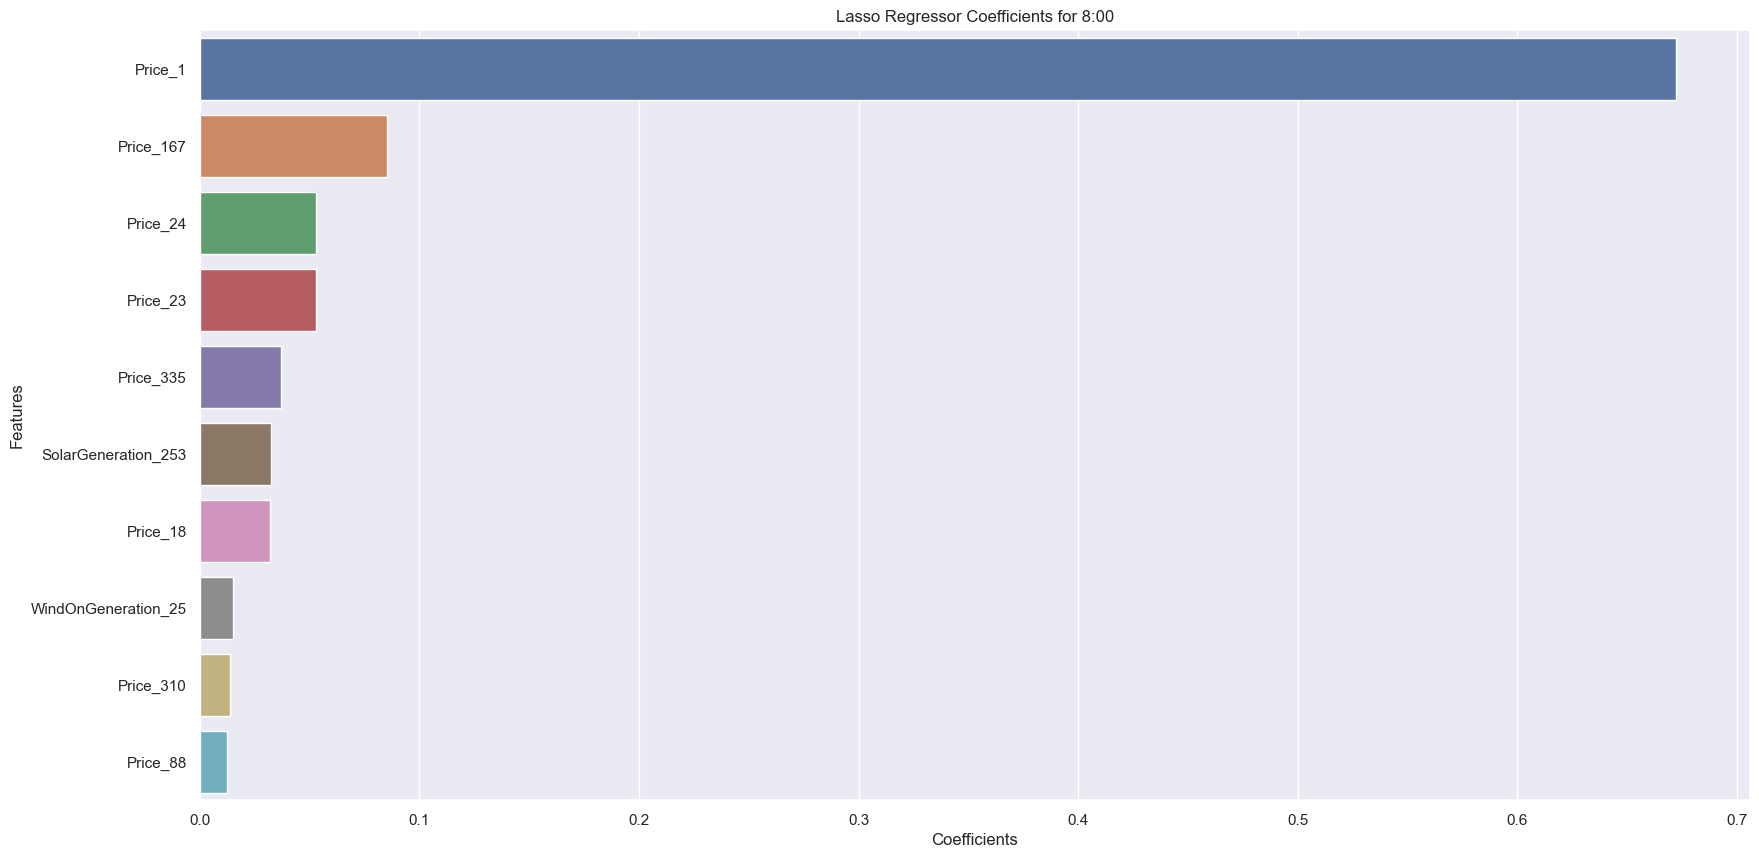

In [155]:
# Barplot for top 10 coeffiecients (features) for hour 8:00

sns.barplot(x=a['Coefficients'],y=a.index )
plt.title('Lasso Regressor Coefficients for 8:00')
plt.ylabel('Features')
plt.xlabel('Coefficients')

In [156]:
# Create multi data frame that will provides us with the residuals and squared residuals for every trained model, 
# for every hour


lasso = {hour: pd.DataFrame() for hour in hours}

for hour in hours:
    lasso[hour] = pd.DataFrame(columns=['Actual Value', 'Predicted Value', 'Residual', 'Squared Residuals'])
    lasso[hour]['Actual Value'] = y[hour]
    lasso[hour]['Predicted Value'] = model[hour].predict(X[hour])
    lasso[hour]['Residual'] = lasso[hour]['Actual Value'] - lasso[hour]['Predicted Value']
    lasso[hour]['Squared Residuals'] = lasso[hour]['Residual'].mul(lasso[hour]['Residual'])


# Example of the table
lasso[15]

,Actual Value,Predicted Value,Residual,Squared Residuals
DateTime,,,,
2015-01-16 15:00:00,36.02,35.130491,0.889509,0.791227
2015-01-17 15:00:00,34.41,35.615913,-1.205913,1.454227
2015-01-18 15:00:00,36.00,36.517933,-0.517933,0.268255
2015-01-19 15:00:00,37.07,40.583010,-3.513010,12.341242
2015-01-20 15:00:00,38.15,38.961650,-0.811650,0.658776
...,...,...,...,...
2020-12-27 15:00:00,50.70,51.058560,-0.358560,0.128565
2020-12-28 15:00:00,48.19,59.155847,-10.965847,120.249796
2020-12-29 15:00:00,53.76,53.938663,-0.178663,0.031920


## Garch Model

In [157]:
from arch import arch_model

# Using arch_lasso_exp as an example, variable b takes an int number pointing the hour 
# we want to produce the arch model

b = 8

arch_lasso_exp = arch_model(lasso[b]['Residual'], vol='GARCH', p=1,q=1, dist='t', mean='Constant')
arch_lasso_exp = arch_lasso_exp.fit()
arch_lasso_exp.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 12666.036487077761
Iteration:      2,   Func. Count:     16,   Neg. LLF: 136477.64549481735
Iteration:      3,   Func. Count:     25,   Neg. LLF: 42050.358058113394
Iteration:      4,   Func. Count:     32,   Neg. LLF: 5931.495327353724
Iteration:      5,   Func. Count:     39,   Neg. LLF: 5925.883732391367
Iteration:      6,   Func. Count:     46,   Neg. LLF: 5922.233475724724
Iteration:      7,   Func. Count:     53,   Neg. LLF: 5922.759370235562
Iteration:      8,   Func. Count:     60,   Neg. LLF: 5921.236674363044
Iteration:      9,   Func. Count:     67,   Neg. LLF: 5921.730827947915
Iteration:     10,   Func. Count:     74,   Neg. LLF: 5919.654184988317
Iteration:     11,   Func. Count:     80,   Neg. LLF: 5919.64637590416
Iteration:     12,   Func. Count:     86,   Neg. LLF: 5919.646296062175
Iteration:     13,   Func. Count:     92,   Neg. LLF: 5919.646293614536
Iteration:     14,   Func. Count:     98,   Neg. LLF: 5919.646

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                     Residual   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -5919.65
Distribution:      Standardized Student's t   AIC:                           11849.3
Method:                  Maximum Likelihood   BIC:                           11877.6
                                              No. Observations:                 2143
Date:                      Tue, Jan 24 2023   Df Residuals:                     2142
Time:                              13:29:02   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.2987  8.879e-02     -3.364  7.683e-04 [ -0.473, -0.125]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0724  6.459e-02      1.120      0.263  [-5.423e-02,  0.199]
alpha[1]       0.0255  1.076e-02      2.365  1.805e-02 [4.356e-03,4.655e-02]
beta[1]        0.9706  1.381e-02     70.286      0.000     [  0.943,  0.998]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             8.6351      1.590      5.432  5.568e-08 [  5.519, 11.751]
========================================================================

Covariance estimator: robust
"""

Text(0.5, 1.0, 'Volatility for 8:00')

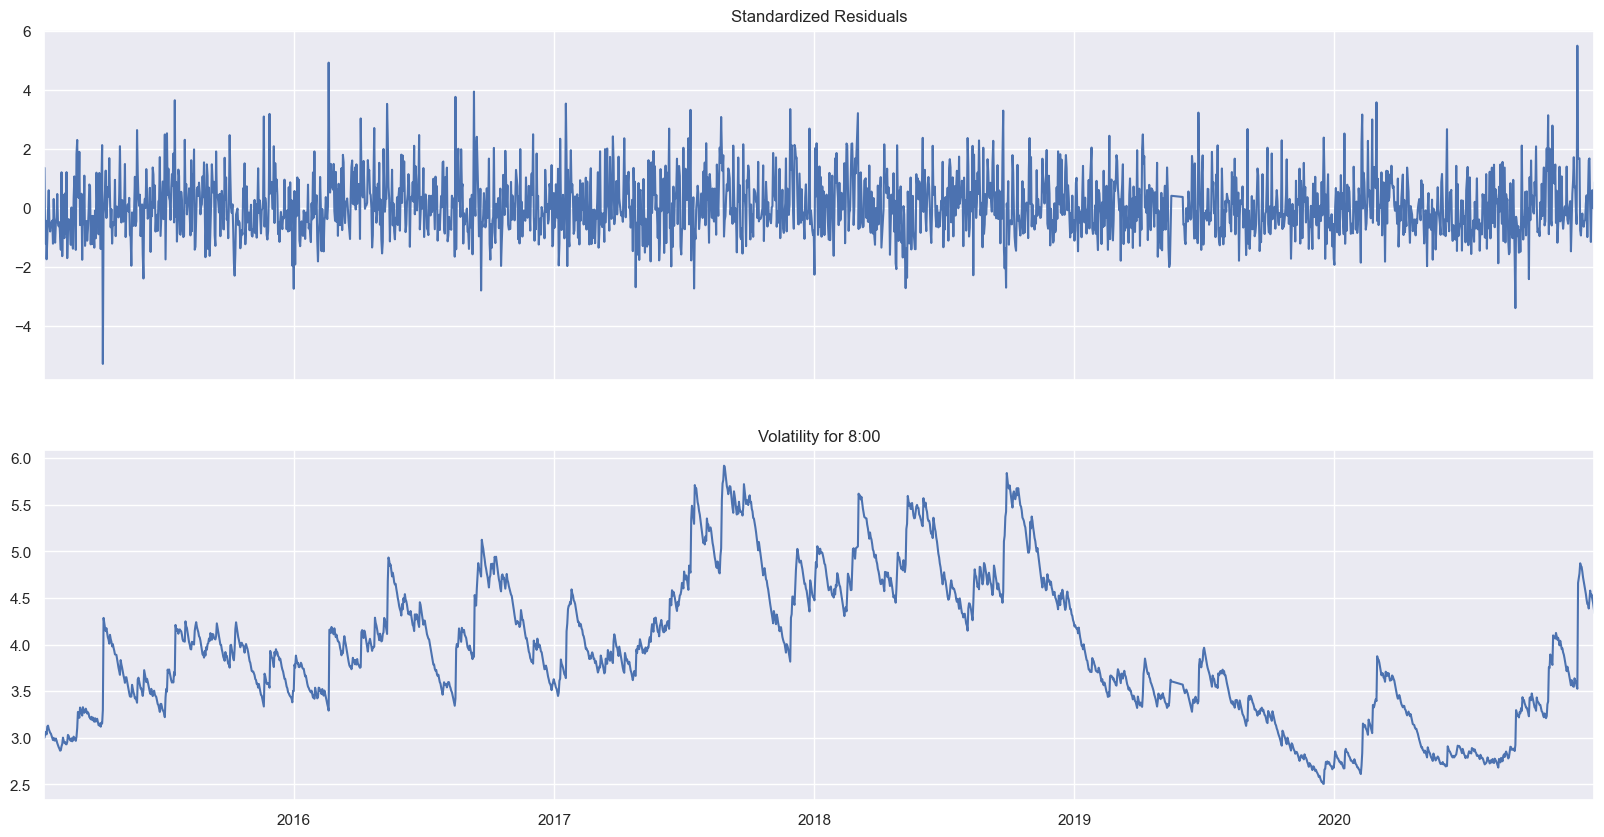

In [158]:
# Producing conditional volatility plot for our garch model

arch_lasso_exp.plot();
plt.title('Volatility for ' + str(b) + ':00')


Text(0.5, 1.0, 'Distribution of Standardized Residuals for GARCH(1,1) - 8:00')

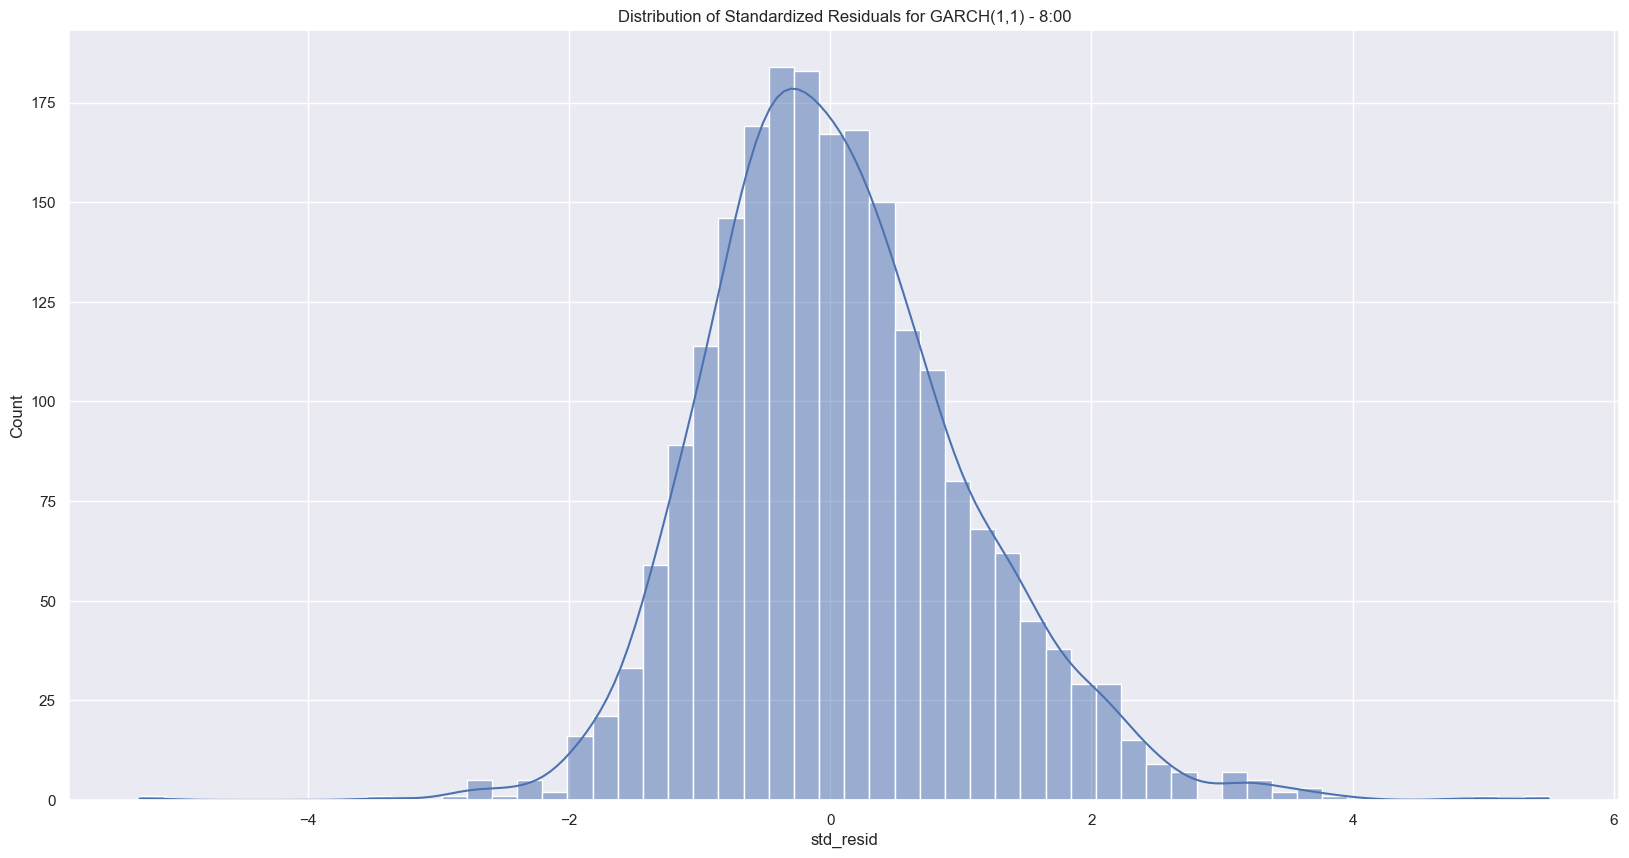

In [159]:
# Plotting the standardized residuals of our garch model

sns.histplot(arch_lasso_exp.std_resid, kde=True)
plt.title('Distribution of Standardized Residuals for GARCH(1,1) - ' + str(b) + ':00')

Text(0.5, 1.0, 'QQplot for Standardized Residuals - GARCH(1,1) 8:00')

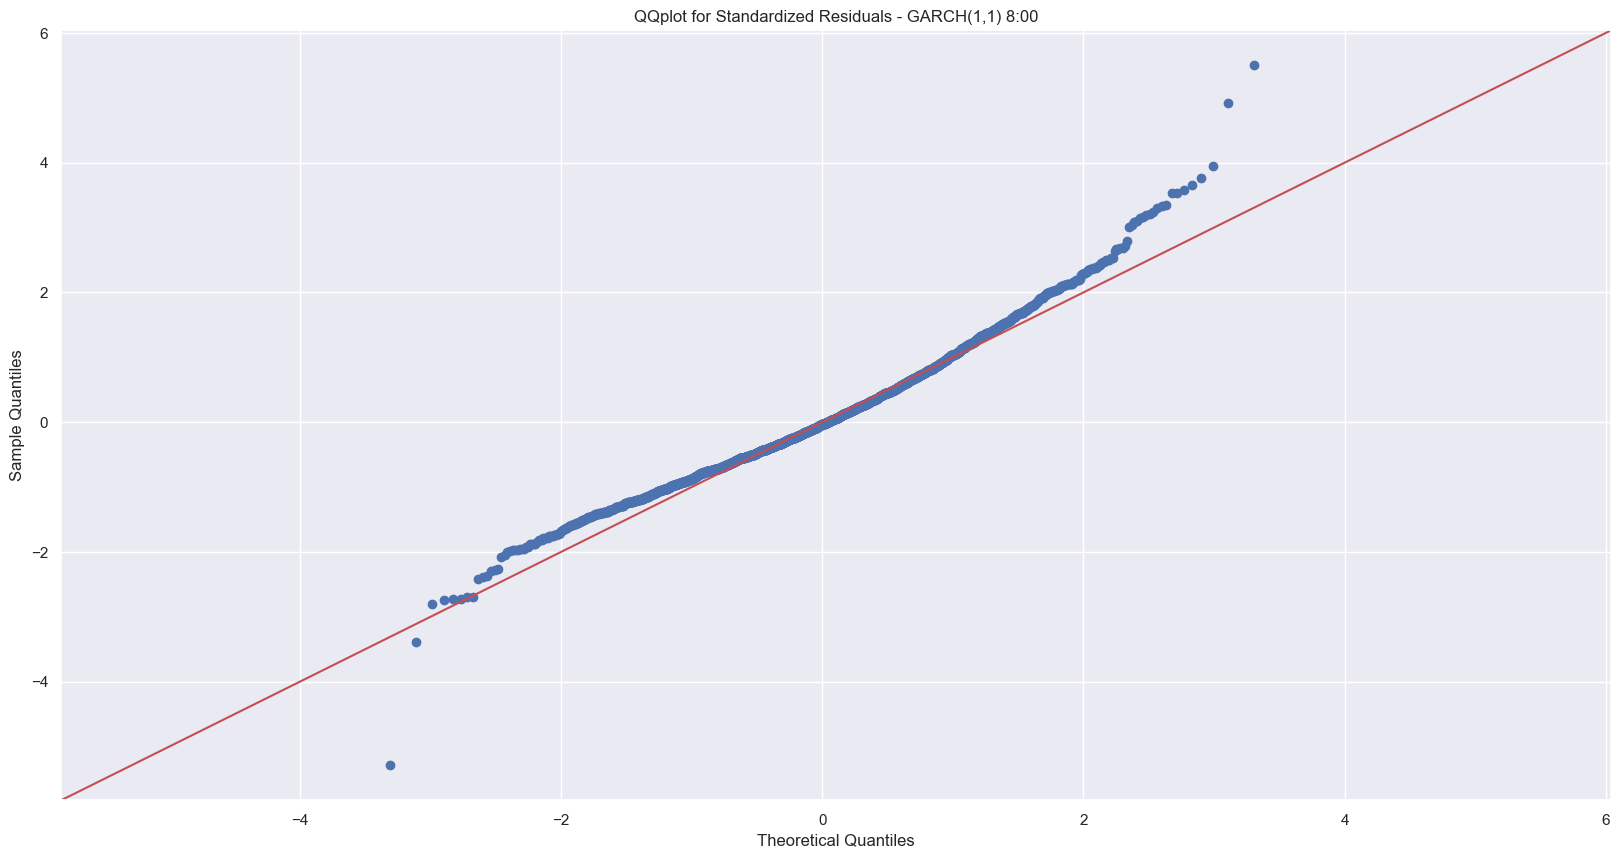

In [160]:
# Plotting the qqplot of our standardized residuals

import statsmodels.api as sm
from scipy.stats import norm
import pylab

x = arch_lasso_exp.std_resid
sm.qqplot(x, line='45')

plt.title('QQplot for Standardized Residuals - GARCH(1,1) ' + str(b) + ':00')

In [161]:
# Training every garch model for every hour ( takes the residuals from our trained lasso models)



from scipy import stats

model = []
pvalue = []
meanval = []
length_resid = []
Q1 = []
Q3 = []

for hour in hours:
    arch_lasso = arch_model(lasso[hour]['Residual'], vol='GARCH', p=1,q=1, dist='t', mean='Zero')
    arch_lasso = arch_lasso.fit()
    x = arch_lasso.std_resid
    stat_test = stats.kstest(x, "norm", alternative='less')
    q1 = np.quantile(x, .25)
    q3 = np.quantile(x, .75)
    model.append('Garch_Lasso['+str(hour)+']')
    pvalue.append(stat_test.pvalue)
    meanval.append(np.mean(x))
    length_resid.append(len(x))
    Q1.append(q1)
    Q3.append(q3)



Iteration:      1,   Func. Count:      6,   Neg. LLF: 35611.510989167495
Iteration:      2,   Func. Count:     14,   Neg. LLF: 8363.077554746398
Iteration:      3,   Func. Count:     22,   Neg. LLF: 7404.713453246404
Iteration:      4,   Func. Count:     28,   Neg. LLF: 7309.289850807646
Iteration:      5,   Func. Count:     34,   Neg. LLF: 5669.453638467019
Iteration:      6,   Func. Count:     40,   Neg. LLF: 5614.697014061832
Iteration:      7,   Func. Count:     46,   Neg. LLF: 7420.585879128323
Iteration:      8,   Func. Count:     53,   Neg. LLF: 5612.158584359558
Iteration:      9,   Func. Count:     59,   Neg. LLF: 5611.10969599977
Iteration:     10,   Func. Count:     64,   Neg. LLF: 5611.106909379685
Iteration:     11,   Func. Count:     69,   Neg. LLF: 5611.10626823008
Iteration:     12,   Func. Count:     74,   Neg. LLF: 5611.106255214846
Iteration:     13,   Func. Count:     78,   Neg. LLF: 5611.106255214845
Optimization terminated successfully    (Exit mode 0)
           

In [162]:
# Summary of results of every Garch_lasso trained

df_arch_results = pd.DataFrame(columns=['Model', 'Pvalues for Normality', 'Mean', 'Sample Length', 'Q1', 'Q3'])
df_arch_results['Model'] = model
df_arch_results['Pvalues for Normality'] = pvalue
df_arch_results['Mean'] = meanval
df_arch_results['Sample Length'] = length_resid
df_arch_results['Q1'] = Q1
df_arch_results['Q3'] = Q3
df_arch_results

,Model,Pvalues for Normality,Mean,Sample Length,Q1,Q3
0,Garch_Lasso[23],3.151290e-05,-0.005349,2132,-0.550507,0.475242
1,Garch_Lasso[0],6.728140e-10,-0.011086,2140,-0.482029,0.428755
2,Garch_Lasso[1],1.425153e-21,0.001234,2140,-0.372534,0.434165
3,Garch_Lasso[2],2.572840e-18,0.008952,2142,-0.427689,0.610400
4,Garch_Lasso[3],1.852027e-20,0.018477,2144,-0.380843,0.571934
5,Garch_Lasso[4],6.516162e-04,-0.014327,2138,-0.565333,0.536359
6,Garch_Lasso[5],1.202353e-03,-0.010945,2135,-0.629180,0.547261
7,Garch_Lasso[6],3.896680e-06,-0.001008,2139,-0.551508,0.535263
8,Garch_Lasso[7],1.401093e-02,-0.011879,2142,-0.667338,0.549553
9,Garch_Lasso[8],4.917691e-02,-0.014783,2143,-0.690028,0.575271


# Simulation of AR(1) process and comparing with every garch_model - WIP

In [163]:
from statsmodels.tsa.arima_process import ArmaProcess

ar = np.array([1, -0.9])
ma = np.array([1])

sim_step = []
mean = []
sd = []

for j in range(len(df_arch_results)):
    for i in range(0,1000):
        ar_factor = ArmaProcess(ar,ma)
        sim_data = ar_factor.generate_sample(nsample=df_arch_results.loc[j][3])
    sim_step.append('sim_arch_lasso_sample_' + str(j))
    mean.append(np.mean(sim_data))
    sd.append(np.std(sim_data))
        

df_simulation = pd.DataFrame(columns=['Simulation', 'Mean', 'SD'])
df_simulation['Simulation'] = sim_step
df_simulation['Mean'] = mean
df_simulation['SD'] = sd
df_simulation
df_compare = pd.concat([df_arch_results, df_simulation], axis="columns")

check = []

for i in range(len(df_compare)):
    if df_compare.iloc[i][7] >= df_compare.iloc[i][4] and df_compare.iloc[i][7] <= df_compare.iloc[i][5]:
        check.append('OK')
    else:
        check.append('NO')

df_compare['Test'] = check

In [164]:
df_compare

,Model,Pvalues for Normality,Mean,Sample Length,Q1,Q3,Simulation,Mean,SD,Test
0,Garch_Lasso[23],3.151290e-05,-0.005349,2132,-0.550507,0.475242,sim_arch_lasso_sample_0,0.273105,2.274707,OK
1,Garch_Lasso[0],6.728140e-10,-0.011086,2140,-0.482029,0.428755,sim_arch_lasso_sample_1,0.157658,2.162845,OK
2,Garch_Lasso[1],1.425153e-21,0.001234,2140,-0.372534,0.434165,sim_arch_lasso_sample_2,-0.128145,2.339993,OK
3,Garch_Lasso[2],2.572840e-18,0.008952,2142,-0.427689,0.610400,sim_arch_lasso_sample_3,-0.165884,2.242765,OK
4,Garch_Lasso[3],1.852027e-20,0.018477,2144,-0.380843,0.571934,sim_arch_lasso_sample_4,-0.098287,2.388737,OK
5,Garch_Lasso[4],6.516162e-04,-0.014327,2138,-0.565333,0.536359,sim_arch_lasso_sample_5,-0.212341,2.396364,OK
6,Garch_Lasso[5],1.202353e-03,-0.010945,2135,-0.629180,0.547261,sim_arch_lasso_sample_6,0.329727,2.455076,OK
7,Garch_Lasso[6],3.896680e-06,-0.001008,2139,-0.551508,0.535263,sim_arch_lasso_sample_7,0.315375,2.516104,OK
8,Garch_Lasso[7],1.401093e-02,-0.011879,2142,-0.667338,0.549553,sim_arch_lasso_sample_8,-0.367313,2.253406,OK
9,Garch_Lasso[8],4.917691e-02,-0.014783,2143,-0.690028,0.575271,sim_arch_lasso_sample_9,0.009637,2.410890,OK
